#### svc suport vector classifier

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.datasets import make_classification
x,y=make_classification(n_samples=1000,n_features=2,n_clusters_per_class=2,n_redundant=0)

In [5]:
x.shape

(1000, 2)

In [6]:
y.shape

(1000,)

In [16]:
df=pd.DataFrame(x,columns=['feature1',"feature2"])

In [17]:
df

,feature1,feature2
0,0.011944,-0.824789
1,-0.511703,-1.971750
2,0.065041,-0.391173
3,-0.972845,-1.639009
4,1.186464,-1.963140
...,...,...
995,1.635462,1.274013
996,-0.239013,0.372878
997,-0.669823,3.836386
998,2.242956,1.556362


In [18]:
df['y']=y

In [19]:
df.head()

,feature1,feature2,y
0,0.011944,-0.824789,1
1,-0.511703,-1.971750,1
2,0.065041,-0.391173,1
3,-0.972845,-1.639009,0
4,1.186464,-1.963140,0


<Axes: xlabel='feature1', ylabel='feature2'>

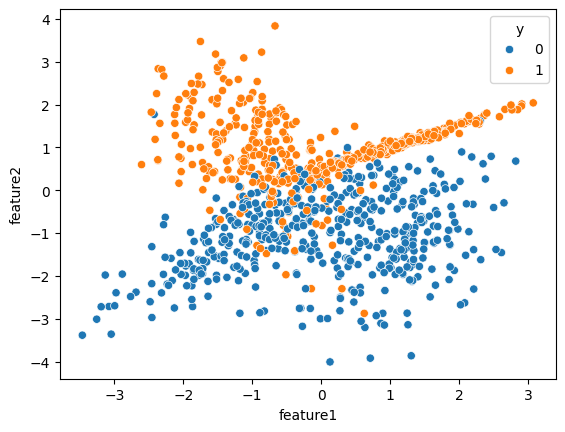

In [26]:
sns.scatterplot(x=df["feature1"],y=df['feature2'],hue=df['y'])

In [27]:
from sklearn.model_selection import train_test_split
x_trian,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [28]:
from sklearn.svm import SVC

svc=SVC(kernel='linear')

In [29]:
svc.fit(x_trian,y_train)

SVC(kernel='linear')

In [30]:
svc.coef_

array([[-0.85259994,  2.37255873]])

In [31]:
svc.intercept_

array([-0.299072])

In [32]:
y_pred=svc.predict(x_test)

In [33]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       114
           1       0.92      0.90      0.91       136

    accuracy                           0.90       250
   macro avg       0.90      0.90      0.90       250
weighted avg       0.90      0.90      0.90       250

[[103  11]
 [ 14 122]]


In [34]:
rbf=SVC(kernel="rbf")
rbf.fit(x_trian,y_train)

SVC()

In [36]:
rbf.intercept_

array([-0.0936181])

In [38]:
y1_pred=rbf.predict(x_test)

In [40]:
print(classification_report(y_test,y1_pred))
print(confusion_matrix(y_test,y1_pred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.90       114
           1       0.92      0.90      0.91       136

    accuracy                           0.90       250
   macro avg       0.90      0.90      0.90       250
weighted avg       0.90      0.90      0.90       250

[[104  10]
 [ 14 122]]


In [41]:
poly=SVC(kernel='poly')
poly.fit(x_trian,y_train)

SVC(kernel='poly')

In [42]:
poly.intercept_

array([-0.0051925])

In [43]:
y_pred1=poly.predict(x_test)

In [44]:
print(classification_report(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       114
           1       0.88      0.90      0.89       136

    accuracy                           0.88       250
   macro avg       0.88      0.88      0.88       250
weighted avg       0.88      0.88      0.88       250

[[ 98  16]
 [ 13 123]]


In [45]:
sig=SVC(kernel='sigmoid')
sig.fit(x_trian,y_train)

SVC(kernel='sigmoid')

In [46]:
sig.intercept_

array([-1.02913886])

In [48]:
y_pred2=sig.predict(x_test)

In [49]:
print(classification_report(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.76      0.77      0.77       114
           1       0.81      0.79      0.80       136

    accuracy                           0.78       250
   macro avg       0.78      0.78      0.78       250
weighted avg       0.78      0.78      0.78       250

[[ 88  26]
 [ 28 108]]


In [67]:
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.01, 101, 10, 10.4, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear','poly']}

In [68]:
grid=GridSearchCV(SVC(),param_grid=param_grid,cv=5,refit=True,verbose=3)
grid.fit(x_trian,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END ....C=0.01, gamma=1, kernel=linear;, score=0.960 total time=   0.0s
[CV 2/5] END ....C=0.01, gamma=1, kernel=linear;, score=0.887 total time=   0.0s
[CV 3/5] END ....C=0.01, gamma=1, kernel=linear;, score=0.927 total time=   0.0s
[CV 4/5] END ....C=0.01, gamma=1, kernel=linear;, score=0.900 total time=   0.0s
[CV 5/5] END ....C=0.01, gamma=1, kernel=linear;, score=0.887 total time=   0.0s
[CV 1/5] END ......C=0.01, gamma=1, kernel=poly;, score=0.927 total time=   0.0s
[CV 2/5] END ......C=0.01, gamma=1, kernel=poly;, score=0.893 total time=   0.0s
[CV 3/5] END ......C=0.01, gamma=1, kernel=poly;, score=0.887 total time=   0.0s
[CV 4/5] END ......C=0.01, gamma=1, kernel=poly;, score=0.873 total time=   0.0s
[CV 5/5] END ......C=0.01, gamma=1, kernel=poly;, score=0.880 total time=   0.0s
[CV 1/5] END ..C=0.01, gamma=0.1, kernel=linear;, score=0.960 total time=   0.0s
[CV 2/5] END ..C=0.01, gamma=0.1, kernel=linear

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 101, 10, 10.4, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'poly']},
             verbose=3)

In [69]:
grid.best_params_

{'C': 101, 'gamma': 1, 'kernel': 'linear'}

In [70]:
grid.best_estimator_

SVC(C=101, gamma=1, kernel='linear')

In [71]:
y_pred4=grid.predict(x_test)

In [72]:
print(classification_report(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.88      0.89      0.89       114
           1       0.91      0.90      0.90       136

    accuracy                           0.90       250
   macro avg       0.89      0.90      0.90       250
weighted avg       0.90      0.90      0.90       250

[[102  12]
 [ 14 122]]
